<a href="https://colab.research.google.com/github/calebmckay1/Unit-1-Build/blob/master/Unit_1_Build_Week_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_15 = pd.read_csv('https://raw.githubusercontent.com/calebmckay1/Unit-1-Build/master/2015.csv')
df_16 = pd.read_csv('https://raw.githubusercontent.com/calebmckay1/Unit-1-Build/master/2016.csv')
df_17 = pd.read_csv('https://raw.githubusercontent.com/calebmckay1/Unit-1-Build/master/2017.csv')
df_18 = pd.read_csv('https://raw.githubusercontent.com/calebmckay1/Unit-1-Build/master/2018.csv')
df_19 = pd.read_csv('https://raw.githubusercontent.com/calebmckay1/Unit-1-Build/master/2019.csv')



# import dataframe from github. Sourced from Kaggle.

In [0]:
df_15['year'] = 2015
df_16['year'] = 2016
df_17['year'] = 2017
df_18['year'] = 2018
df_19['year'] = 2019

# added year column to view trends in future visualizations.

In [0]:
df_16 = df_16.drop(['Upper Confidence Interval', 'Lower Confidence Interval',
                    'Happiness Rank','Dystopia Residual'], axis=1)
df_15 = df_15.drop(['Standard Error','Happiness Rank','Dystopia Residual'], axis=1)
df_17 = df_17.drop(['Whisker.high', 'Whisker.low','Happiness.Rank','Dystopia.Residual'], axis=1)
df_18 = df_18.drop(['Overall rank'], axis=1)
df_19 = df_19.drop(['Overall rank'], axis=1)

# dropped unimportant columns.

In [0]:
df_17 = df_17.rename(columns={'Happiness.Score': 'Happiness Score',
       'Economy..GDP.per.Capita.':'Economy (GDP per Capita)', 
       'Health..Life.Expectancy.':'Health (Life Expectancy)',
       'Trust..Government.Corruption.':'Trust (Government Corruption)'})

# changed column names to match so we can combine them all later.

In [0]:
df_18 = df_18.rename(columns= {'Country or region': 'Country', 'Score':'Happiness Score',
       'GDP per capita':'Economy (GDP per Capita)', 'Social support':'Family', 
       'Healthy life expectancy': 'Health (Life Expectancy)',
       'Freedom to make life choices': 'Freedom',
       'Perceptions of corruption': 'Trust (Government Corruption)'})

# changed column names to match so we can combine them all later.

In [0]:
df_19 = df_19.rename(columns= {'Country or region': 'Country', 'Score':'Happiness Score',
       'GDP per capita':'Economy (GDP per Capita)', 'Social support':'Family', 
       'Healthy life expectancy': 'Health (Life Expectancy)',
       'Freedom to make life choices': 'Freedom',
       'Perceptions of corruption': 'Trust (Government Corruption)'})

# changed column names to match so we can merge later.

In [0]:
df_17['Region'] = df_16['Region']
df_18['Region'] = df_16['Region']
df_19['Region'] = df_16['Region']

# added the missing Region column to the dataframes using 2016's region column.

In [0]:
world_happiness = pd.concat([df_15, df_16, df_17, df_18, df_19])

# combined all the years into one dataframe.

In [0]:
world_happiness = world_happiness.rename(columns= {'Happiness Score':'Score',
       'Economy (GDP per Capita)':'GDP', 
       'Health (Life Expectancy)':'Health',
       'Trust (Government Corruption)':'Trust'})

# shortened the column headers to make a correlation matrix easier to read later.

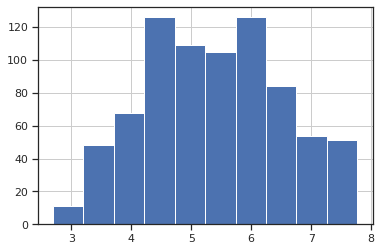

In [42]:
world_happiness['Score'].hist();

# explored the distribution of happiness score throughout the dataset

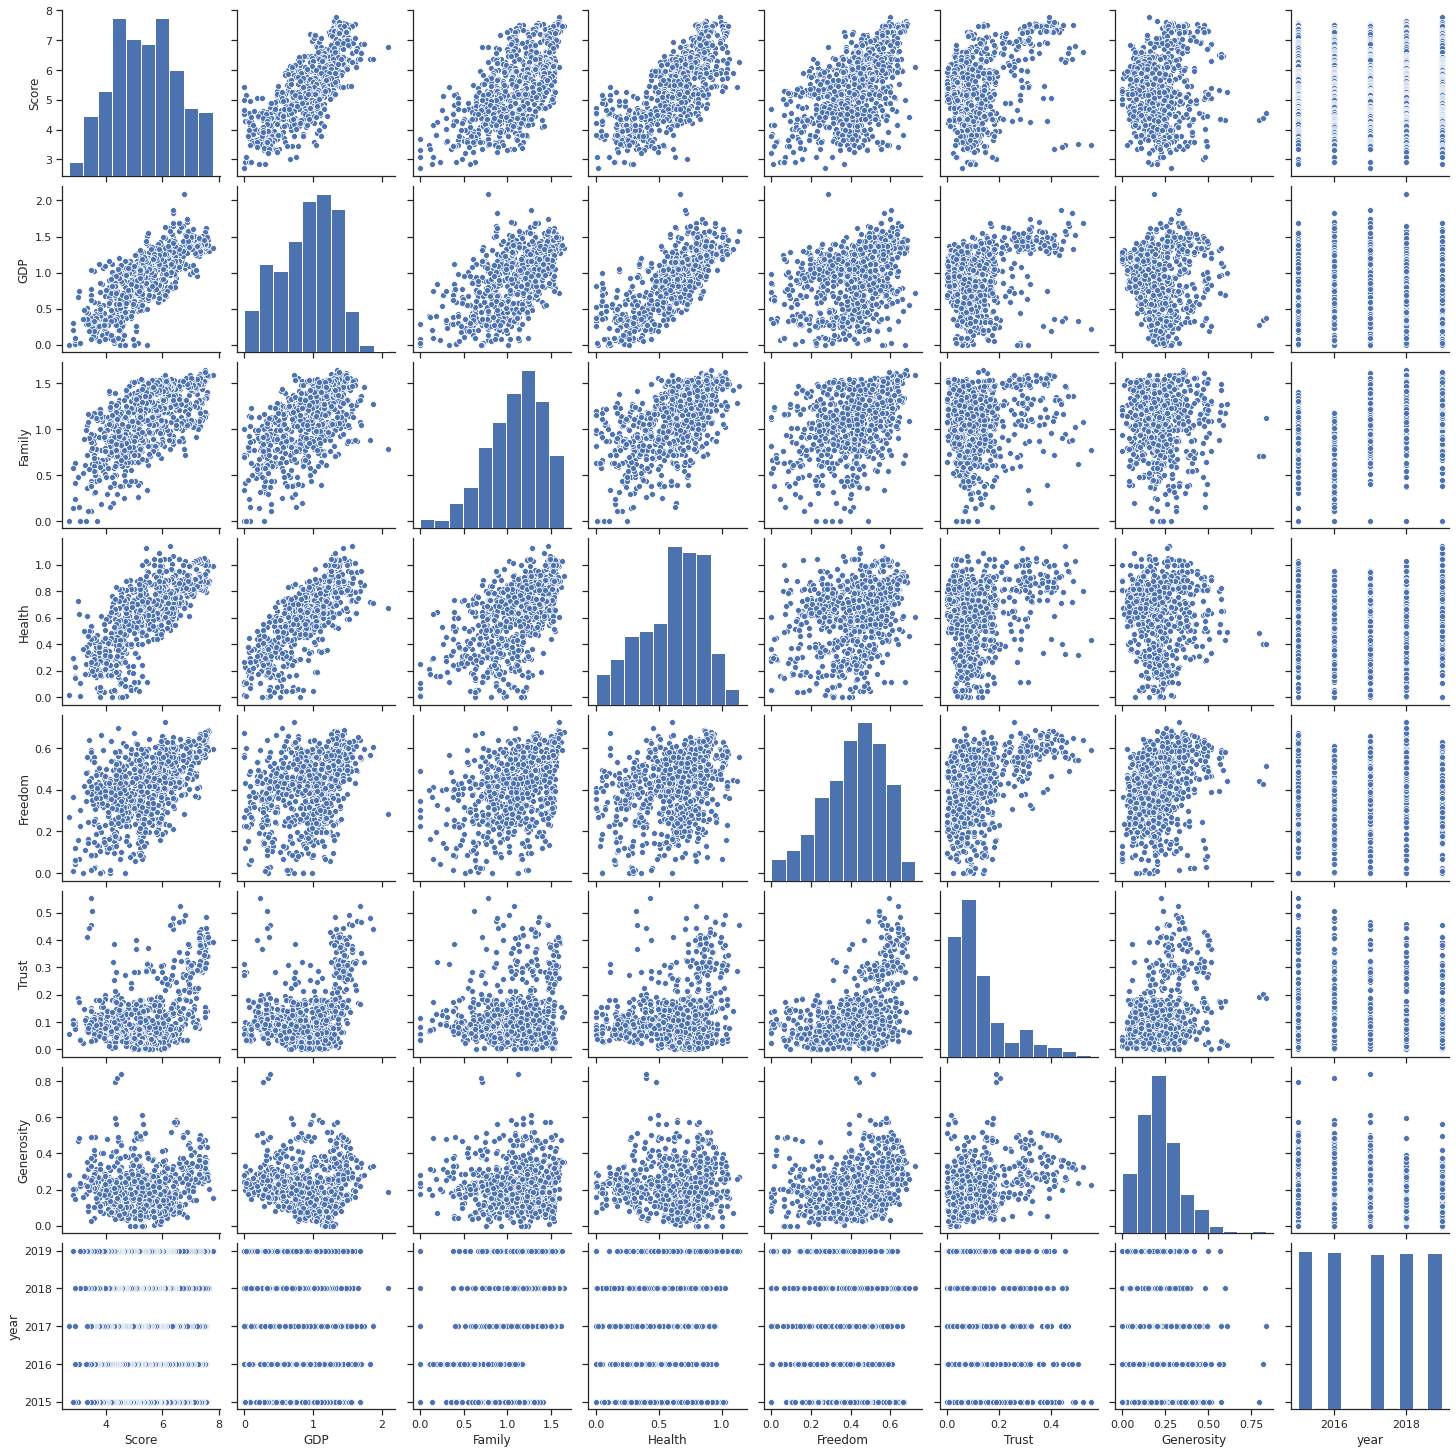

In [43]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
plotted = sns.pairplot(world_happiness)

# explored different columns on x and y in bulk using seaborn

In [0]:
world_happiness_corr = world_happiness.corr()

# created a correlation matrix called 'world_happiness_corr'

In [35]:
world_happiness_corr.style.background_gradient(cmap='coolwarm')
world_happiness_corr.style.background_gradient(cmap='coolwarm').set_precision(1)

# viewed the correlation matrix with a colorscheme to get an easier view of 
# the higher and lower correlations.

,Score,GDP,Family,Health,Freedom,Trust,Generosity,year
Score,1.0,0.8,0.6,0.7,0.6,0.4,0.1,0.0
GDP,0.8,1.0,0.6,0.8,0.3,0.3,-0.0,0.0
Family,0.6,0.6,1.0,0.6,0.4,0.1,-0.0,0.4
Health,0.7,0.8,0.6,1.0,0.3,0.3,0.0,0.1
Freedom,0.6,0.3,0.4,0.3,1.0,0.5,0.3,0.0
Trust,0.4,0.3,0.1,0.3,0.5,1.0,0.3,-0.1
Generosity,0.1,-0.0,-0.0,0.0,0.3,0.3,1.0,-0.2
year,0.0,0.0,0.4,0.1,0.0,-0.1,-0.2,1.0


In [0]:
world_happiness_table = pd.pivot_table(world_happiness, values='Score', 
                     index=['Region'], 
                     columns='year')

# created a pivot table using Score as the main target, with region and 
# year as variables.

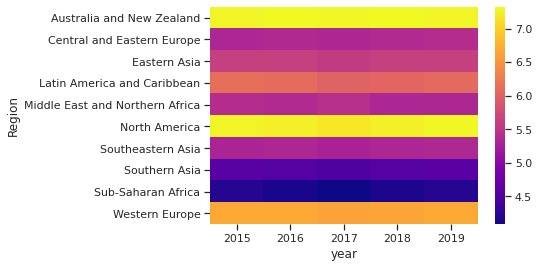

In [37]:
import seaborn as sns
sns.heatmap(world_happiness_table, cmap='plasma');

# plotted the pivot table into a heatmap to view 'happiness score' trends
# from 2015 to 2019

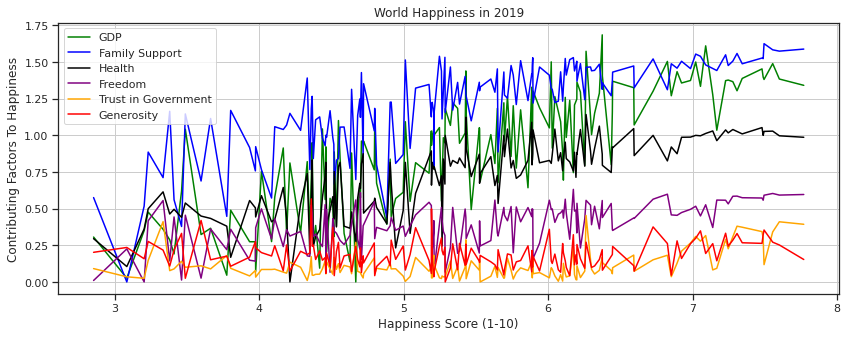

In [38]:
plt.figure(figsize=(14,5))
plt.plot(df_19['Happiness Score'],df_19['Economy (GDP per Capita)'], label= 'GDP', color= 'green')
plt.plot(df_19['Happiness Score'],df_19['Family'], label= 'Family Support', color= 'blue')
plt.plot(df_19['Happiness Score'],df_19['Health (Life Expectancy)'], label= 'Health', color= 'black')
plt.plot(df_19['Happiness Score'],df_19['Freedom'], label= 'Freedom', color= 'purple')
plt.plot(df_19['Happiness Score'],df_19['Trust (Government Corruption)'], label= 'Trust in Government', color= 'orange')
plt.plot(df_19['Happiness Score'],df_19['Generosity'], label= 'Generosity', color= 'red')

plt.xlabel('Happiness Score (1-10)')
plt.ylabel('Contributing Factors To Happiness')
plt.title('World Happiness in 2019')

plt.grid()
plt.legend()
plt.show()

# plotted the varibles that contribute to happiness to visually see the correlations.

In [0]:
import plotly
import plotly.graph_objs as go
from plotly.offline import *

# imported plotly for offline use (had to in order to run next cell)

In [40]:
global_happiness = dict(type = 'choropleth',
             locations = world_happiness['Country'],
             locationmode = 'country names',
             z = world_happiness['Score'],
             text = world_happiness['Country'],
             colorscale = 'plasma',
             autocolorscale=False,
             colorbar= {'title':'Happiness'})
layout = dict(title = 'Average Happiness on 1-10 Scale',
              geo = dict(showframe = False, 
                         projection = {'type':'equirectangular'}))
choromap1 = go.Figure(data= [global_happiness], layout = layout)
iplot(choromap1)

# created a heatmap called 'choromap1' that displays the average happiness score
# of each country. 